# Oficina Análise e visualiação gráfica

Perguntas a serem respondidas.

1. Crie uma visualização que mostre o orçamento de todos os filmes do conjunto de dados. Qual o filme com maior orçamento e com menor orçamento?
2. Crie uma visualização que mostre a bilheteria de todos os filmes do conjunto de dados. Qual o filme com maior bilheteria e 3. com menor bilheteria?
4. Crie uma visualização que mostre a quantidade de filmes por gênero em cada ano. Em que anos foram feitos menos filmes de ação? E em que ano foram feitos menos filmes de animação?
5. Crie uma visualização que mostre a média de orçamento de filmes por gênero em cada ano. Em que ano os filmes de ação tiveram maior média de orçamento? E em que ano os filmes de animação tiveram a maior média de orçamento?

In [7]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Explorando o conjunto de dados de filmes lançados entre 2007 e 2011.

In [9]:
df = pd.read_json('dadosoficina03.txt')
df.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


In [10]:
# Modificando nomes de colunas
df.columns = ['Filmes', 'Ano', 'Gênero', 'Bilheteria', 'Orçamento']
df.head(10)

,Filmes,Ano,Gênero,Bilheteria,Orçamento
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200
5,The Dark Knight,2008,Thriller,999,185
6,Avatar,2009,Action,2784,237
7,Transformers: Dark of the Moon,2011,Action,1123,195
8,Iron Man 2,2010,Action,622,200
9,Kung Fu Panda 2,2011,Animation,663,150


In [11]:
# Obter medidas estatística dos atributos do dataframe
df.describe()

,Ano,Bilheteria,Orçamento
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


## Visualizações dos orçamentos dos filmes

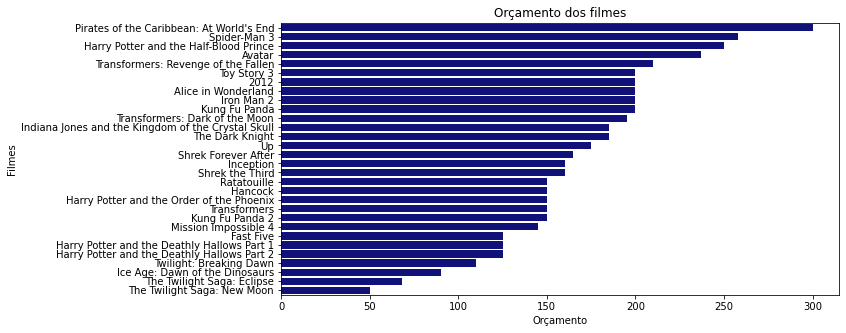

In [12]:
# RESPOSTA 1: visualização oa orçamento de todos os filmes do conjunto de dados.
# Qual o filme com MAIOR ORÇAMENTO? Pirates of the Caribean: At World's End.
# Qual o filme com MENOR ORÇAMENTO? The Twilight Saga: New Moon.

plt.figure(figsize=(10, 5))
plt.title('Orçamento dos filmes')
sns.barplot(y="Filmes", x="Orçamento", color = 'darkblue', estimator = sum, ci = None, data=df.sort_values(by='Orçamento', ascending=False))
plt.show()

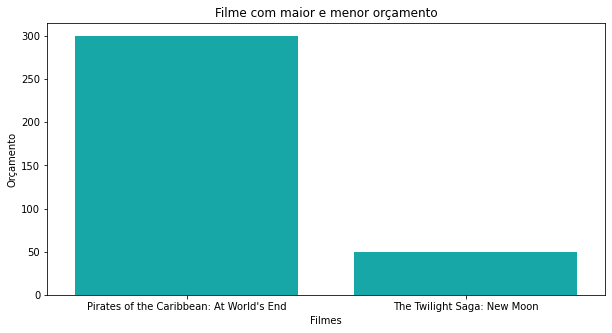

In [19]:
# Gráfico sumário da questão.
plt.figure(figsize=(10, 5))
plt.title('Filme com maior e menor orçamento')
alto = df.sort_values(by='Orçamento', ascending=False).head(1)
menor = df.sort_values(by='Orçamento', ascending=True).head(1)
df_orc = pd.concat([alto, menor])
sns.barplot(x="Filmes", y="Orçamento", color = 'c', estimator = sum, ci = None, data=df_orc.sort_values(by='Orçamento', ascending=False))
plt.show()

## Visualização da bilheteria dos filmes

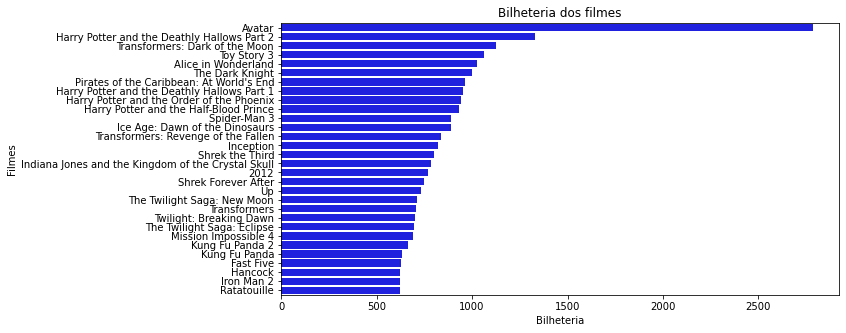

In [24]:
# RESPOSTA 2: visualização Da bilheteria de todos os filmes do conjunto de dados.
# Qual o filme com maior bilheteria? AVATAR
# qUAL o filme com menor bilheteria? RATATOUILE

plt.figure(figsize=(10, 5))
plt.title('Bilheteria dos filmes')
sns.barplot(y="Filmes", x="Bilheteria", color = 'b', estimator = sum, ci = None, data=df.sort_values(by='Bilheteria', ascending=False))
plt.show()

<AxesSubplot:xlabel='Filmes', ylabel='Bilheteria'>

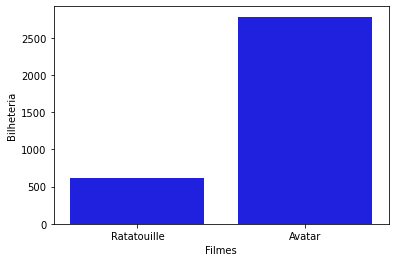

In [28]:
maiorB=df.sort_values(by='Bilheteria', ascending=True).head(1)
menorB=df.sort_values(by='Bilheteria').tail(1)
df_bilheteria = pd.concat([maiorB, menorB])
sns.barplot(x="Filmes", y="Bilheteria", color = 'b', estimator = sum, ci = None, data=df_bilheteria)

## Visualização da quantidade de filmes por gênero em cada ano

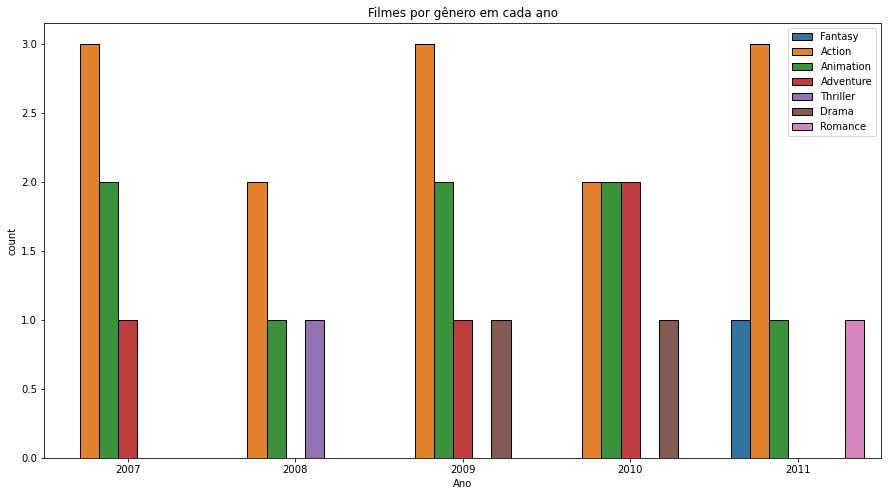

In [21]:
# REPOSTA 3 - Visualização filmes por gênero em cada ano.
# Em que anos foram feitos menos filmes de AÇÃO? anos 2008 e 2010
# Em que ano foram feitos menos filmes de ANIMAÇÃO? anos 2008 e 2011

plt.figure(figsize=(15,8))
plt.title('Filmes por gênero em cada ano')
sns.countplot(x="Ano", hue='Gênero', palette="tab10", edgecolor="0", data=df)
plt.legend(loc='upper right')
plt.show()

## Visualiação da média de orçamento dos filmes por gênero em cada ano

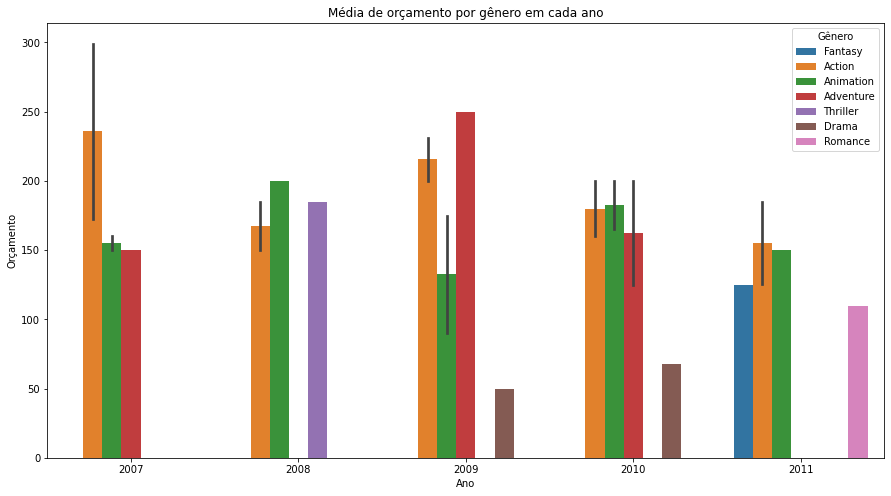

In [36]:
# REPOSTA 4 - Visualização média de orçamentos em cada ano.
# Em que ano os filmes de AÇÃO tiveram MAIOR média de orçamento? ano 2007
# Em que ano os filmes de ANIMAÇÃO tiveram MAIOR média de orçamento? ano 2008
# Obtendo média de orçamentos por gênero em cada ano
plt.figure(figsize=(15,8))
plt.title('Média de orçamento por gênero em cada ano')
sns.barplot(x="Ano", y = 'Orçamento', ci = 'sd', hue = 'Gênero', data=df)
plt.show()

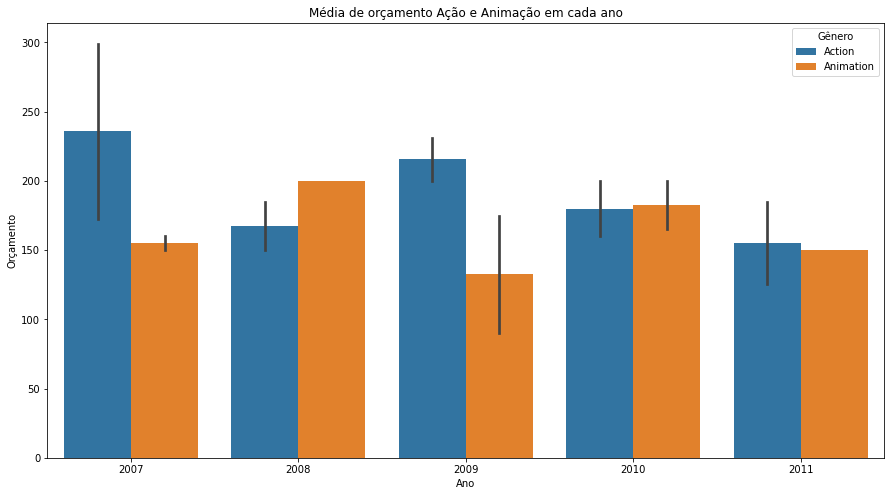

In [35]:
# Visualiação gênero animação e ação.
plt.figure(figsize=(15,8))
plt.title('Média de orçamento Ação e Animação em cada ano')
df_filtro = df.query('Gênero == "Action" | Gênero == "Animation"')
sns.barplot(x="Ano", y = 'Orçamento', ci = 'sd', hue = 'Gênero', data=df_filtro)
plt.show()